In [5]:
# Importar librerías
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')

In [2]:
# Montar drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [24]:
# Importar datos
path = '/content/drive/MyDrive/Coding Dojo/Modulo 2/ds_salaries.csv'
df = pd.read_csv(path)
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [26]:
# Cantidad de filas y columnas
df.shape

(3755, 11)

In [27]:
# Buscar filas duplicadas
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3750    False
3751    False
3752    False
3753    False
3754    False
Length: 3755, dtype: bool

In [28]:
# Contar valores duplicados
df.duplicated().sum()

1171

Debido a que no hay una columna con un identificador(código), ni se cuenta con variables que permitan construir un identificador único para cada registro, se decide no eliminar las filas que aparecen como duplicadas, ya que podría subestimarse el modelo y restar robustez a los resultados.

In [29]:
# Identificar valores faltantes(nulos) por columna
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [30]:
# Total de valores faltantes
print(df.isna().sum().sum(), 'missing values')

0 missing values


In [31]:
df['experience_level'].value_counts()

SE    2516
MI     805
EN     320
EX     114
Name: experience_level, dtype: int64

EN = Entry Level

MI = Mid Level

SE = Senior Level

EX = Executive Level.

In [32]:
df['job_title'].value_counts()

Data Engineer                          1040
Data Scientist                          840
Data Analyst                            612
Machine Learning Engineer               289
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: job_title, Length: 93, dtype: int64

In [33]:
# En la columna 'experience_level' se puede clasificar los datos de manera ordinal
df['experience_level'] = df['experience_level'].replace('EN', 0)
df['experience_level'] = df['experience_level'].replace('MI', 1)
df['experience_level'] = df['experience_level'].replace('SE', 2)
df['experience_level'] = df['experience_level'].replace('EX', 3)
df['experience_level'].value_counts()

2    2516
1     805
0     320
3     114
Name: experience_level, dtype: int64

In [34]:
# Obtener las estadísticas de las columnas numéricas
df.describe().round(2)

,work_year,experience_level,salary,salary_in_usd,remote_ratio
count,3755.00,3755.00,3755.00,3755.00,3755.00
mean,2022.37,1.65,190695.57,137570.39,46.27
std,0.69,0.68,671676.50,63055.63,48.59
min,2020.00,0.00,6000.00,5132.00,0.00
25%,2022.00,1.00,100000.00,95000.00,0.00
50%,2022.00,2.00,138000.00,135000.00,0.00
75%,2023.00,2.00,180000.00,175000.00,100.00
max,2023.00,3.00,30400000.00,450000.00,100.00


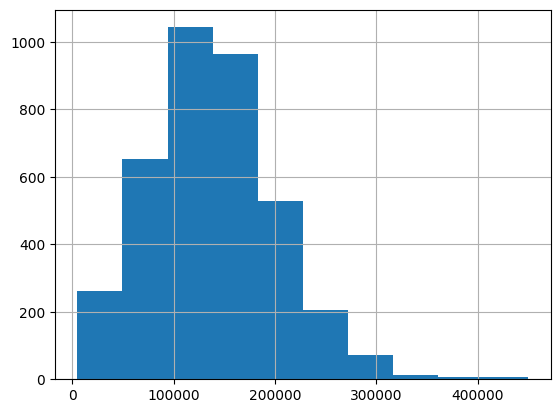

In [35]:
# Hacer un histograma y remover notación científica
df['salary_in_usd'].hist()
plt.ticklabel_format(useOffset=False, style='plain')

Podemos ver que la la mayor concentración de observaciones, se concentran en el rango de salario 100000 a 200000.

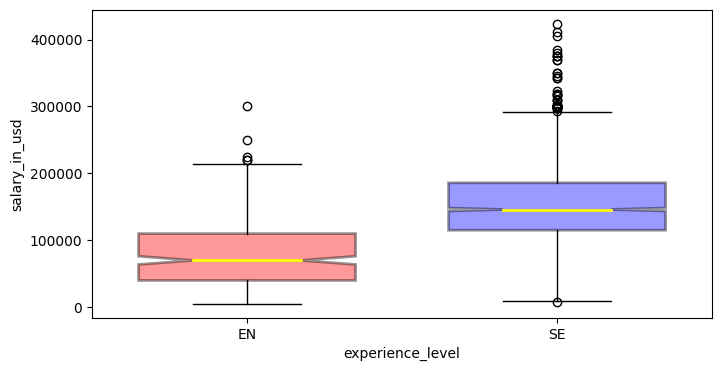

In [36]:
# Para analizar mejor los salarios, se genera un gráfico agregando una variable categórica
# Se genera estilo seaborn
# Se generan dos df, uno para cada filtro creado
# Se genera el boxplot
entry_level = df.loc[df['experience_level']==0,'salary_in_usd']
senior_level = df.loc[df['experience_level']==2,'salary_in_usd']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,4))
boxplots = axes.boxplot([entry_level,senior_level],
           notch = True,
           labels=['EN', 'SE'],
           widths = .7,
           patch_artist=True,
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .4)
          );
# Se personaliza el gráfico
boxplot1 = boxplots['boxes'][0]
boxplot1.set_facecolor('red')
plt.xlabel('experience_level', fontsize = 10);
plt.ylabel('salary_in_usd', fontsize = 10);
plt.xticks(fontsize = 10);
plt.yticks(fontsize = 10);

Se puede observar que las distribuciones de los datos(salary_in_usd) son un poco diferentes cuando el nivel de experiencia es el más bajo y cuando es "senior". Además en ambos casos existen algunos valores atípicos que se encuentran por encima del "máximo", especialmente en el nivel de experiencia "senior".